In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [19]:
import arviz as az
import h5py
import pystan
import scipy.stats as ss
import seaborn as sns

sns.set_style('ticks')
sns.set_palette('colorblind')
sns.set_context('notebook')

In [3]:
with h5py.File('../comoving-positions.h5', 'r') as f:
    pts = array(f['pos'])

In [7]:
model = pystan.StanModel(file='PerfectPositionMock.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d1a1f05d16cfe8c040855e263ac6ca6d NOW.
/Users/wfarr/anaconda3/envs/GWBAO/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/35/vcq24mtj2_g5wk96mbck0cw400018s/T/tmph6wh_t7v/stanfit4anon_model_d1a1f05d16cfe8c040855e263ac6ca6d_723844353042377027.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [15]:
dC_range = 0.77

N = 128

data = {
    'nobs': N,
    'pts': pts[:N,:],
    'mu_n0': log(500*N/pts.shape[0]),
    'sigma_n0': 1,
    'V': 4/3*pi*dC_range**3*5 # Volume * Time
}

In [16]:
fit = model.sampling(data=data, iter=400)

/Users/wfarr/anaconda3/envs/GWBAO/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112c32438>,
      dtype=object)

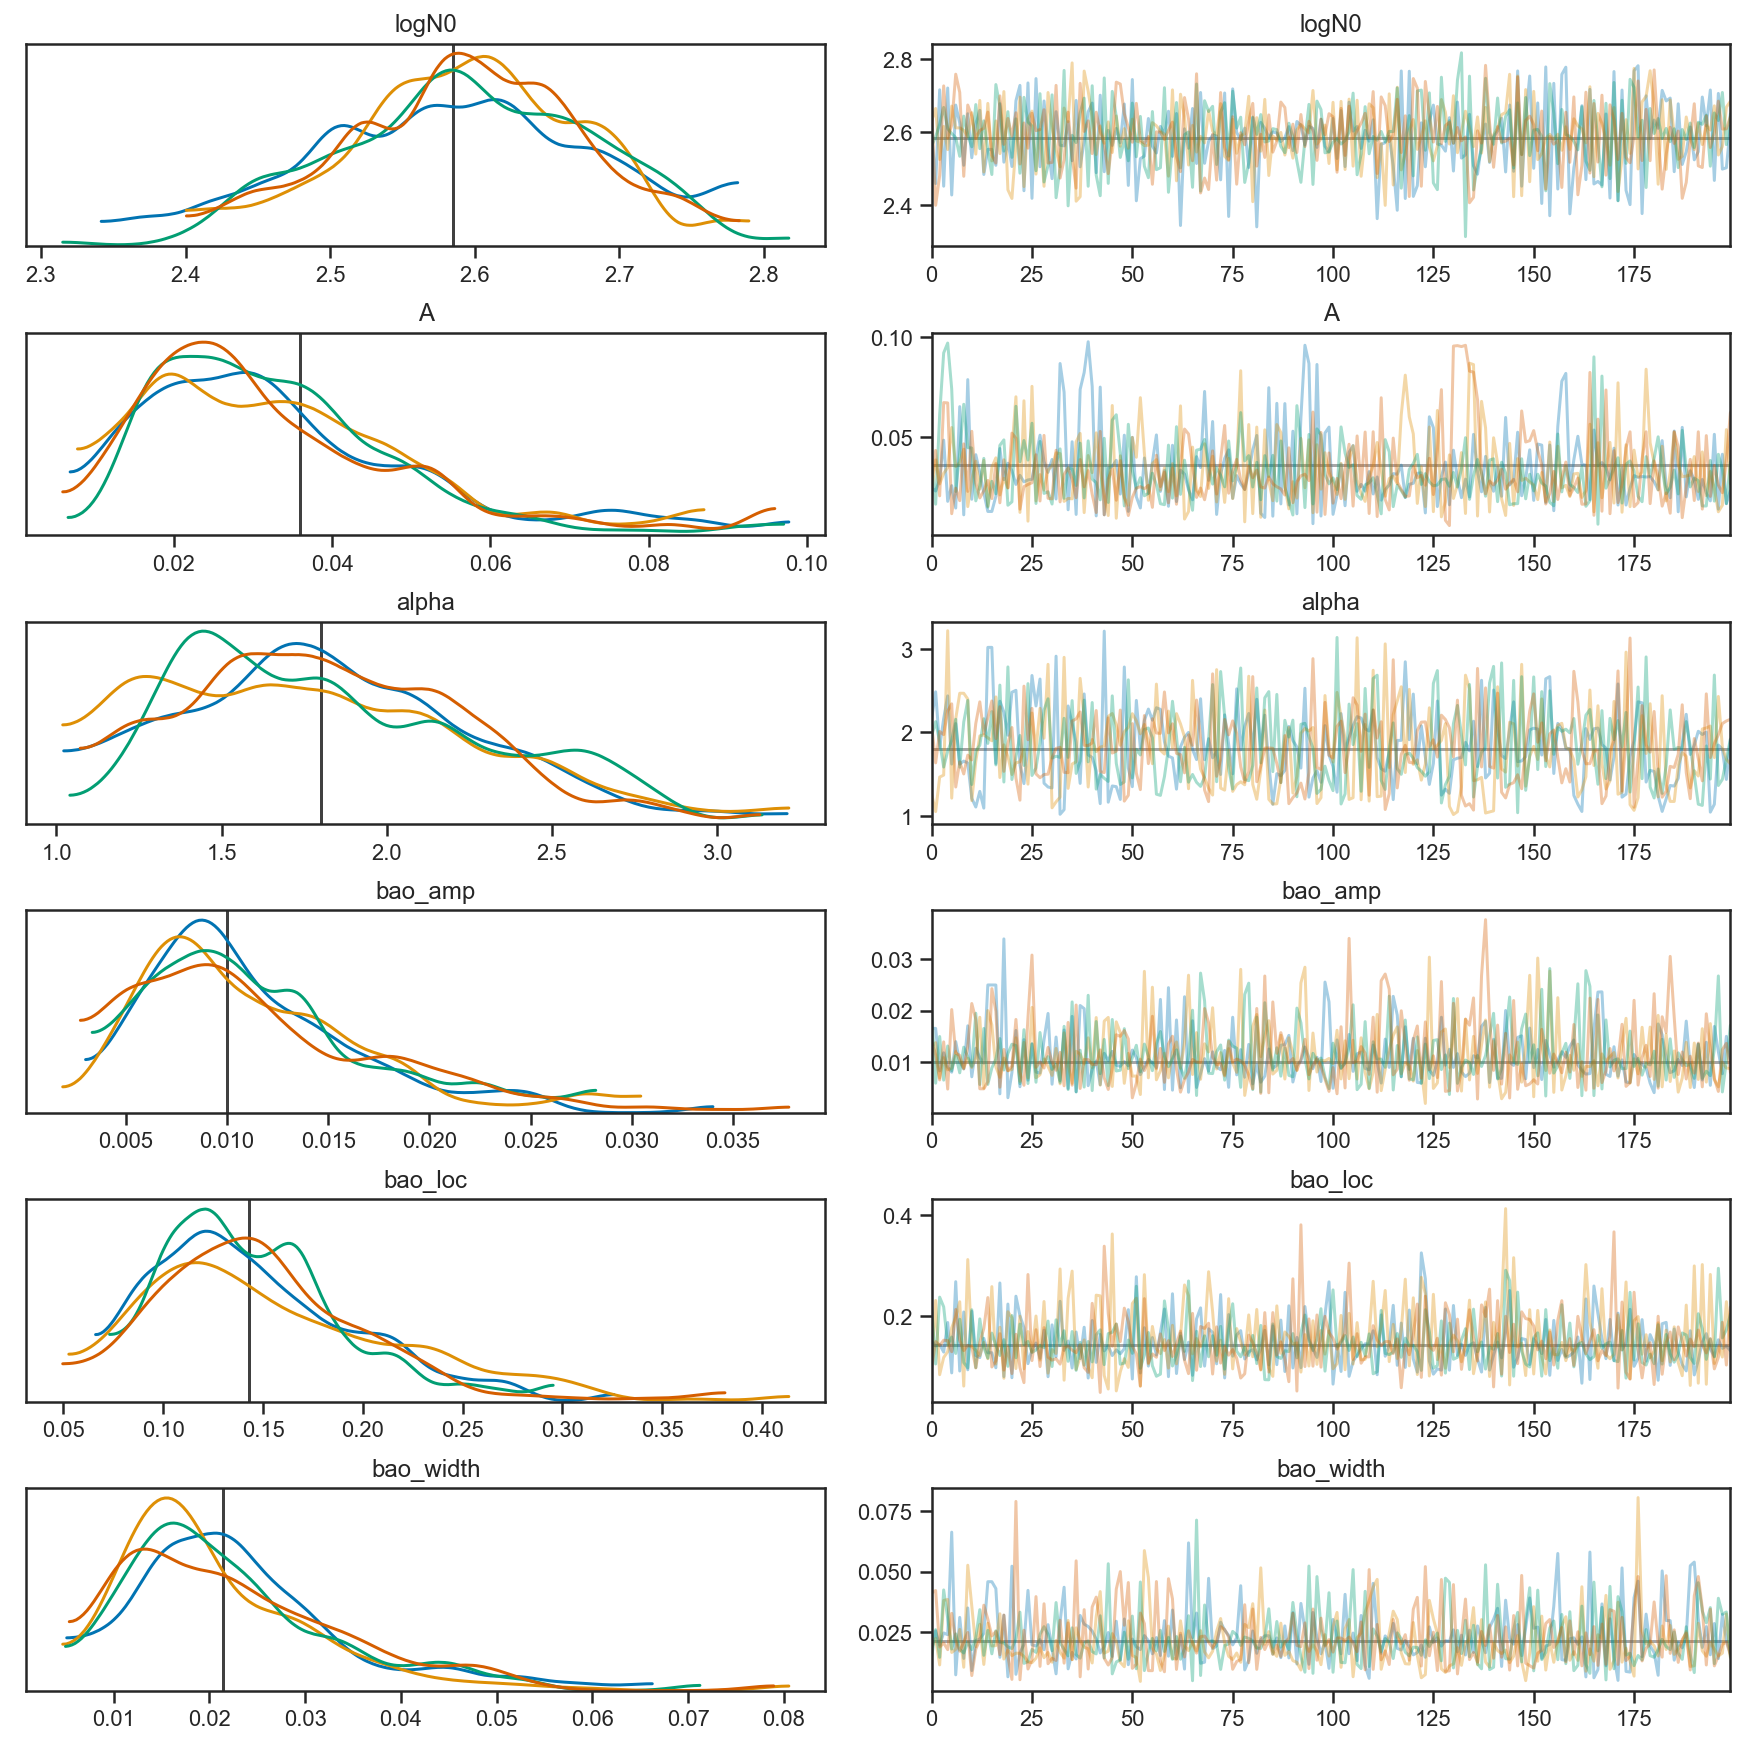

In [17]:
az.plot_trace(fit, var_names=['logN0', 'A', 'alpha', 'bao_amp', 'bao_loc', 'bao_width'], 
              lines=[('logN0', {}, log(518*N/pts.shape[0])),
                     ('A', {}, sqrt(0.00129463)),
                     ('alpha', {}, 1.8),
                     ('bao_amp', {}, 0.01),
                     ('bao_loc', {}, 100/0.7/1000),
                     ('bao_width', {}, 15/0.7/1000)])

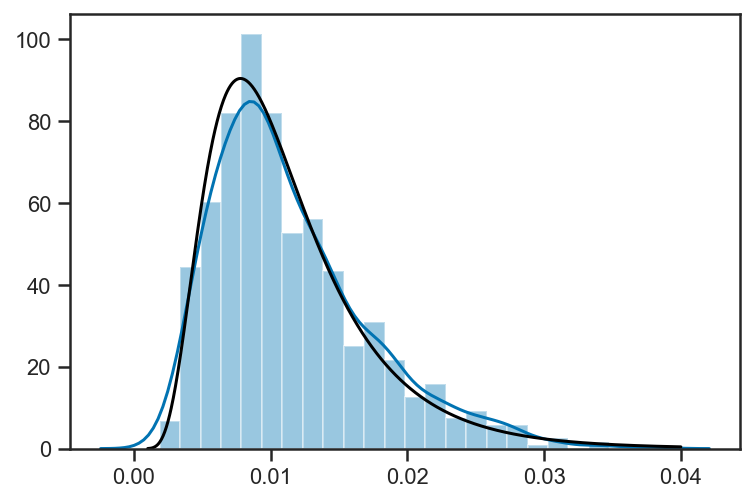

In [22]:
sns.distplot(fit['bao_amp'])
x = linspace(0.001, 0.04, 1000)
plot(x, ss.lognorm(0.5, scale=1e-2).pdf(x), '-k')